In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import linalg

# The quadratic form in algebra

In [ ]:

# matrix and vector
S = [ [ 1,  3, -2],
      [ 0,  3,  4],
      [-5, -2,  4] ]

w = np.transpose([ [-2, 4, 3] ])

# compute the quadratic form
qf = w.T@S@w

print(qf)

[[130]]


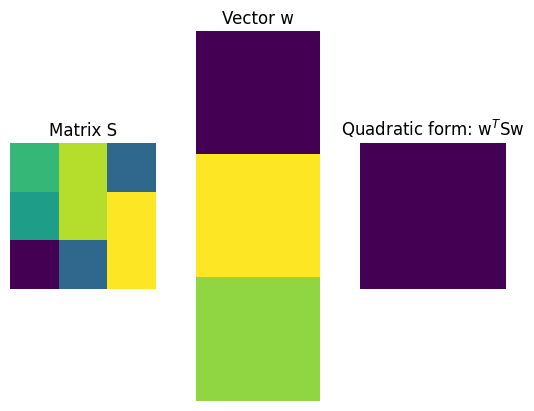

In [ ]:
n = len(w) # used for plotting

# show the matrices
plt.subplot(131)
plt.imshow(S)
plt.axis('off')
plt.title('Matrix S')

plt.subplot(132)
plt.imshow(w)
plt.axis('off')
plt.title('Vector w')

plt.subplot(133)
plt.imshow(qf)
plt.title('Quadratic form: w$^T$Sw')
plt.axis('off')

plt.show()

# The quadratic form in geometry

<ipython-input-9-7fb0a2e210fb>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.zeros((4,), dtype=np.object)


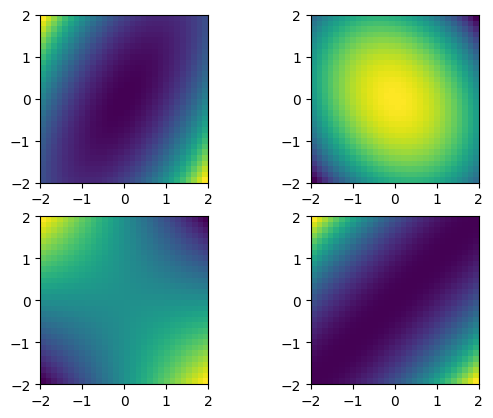

In [ ]:
# some different matrices
S = np.zeros((4,), dtype=np.object)

S[0] = [ [ 4, 4], [4, 9] ]
S[1] = [ [-4,-1], [3,-5] ]
S[2] = [ [ 0, 1], [2, 0] ]
S[3] = [ [ 1, 1], [1, 1] ]

# range for vector w
n = 30
wRange = np.linspace(-2,2,n)

# initialize quadratic form matrix
qf = np.zeros( (n,n) )


for i in range(4):

    # compute QF
    for xi in range(n):
        for yi in range(n):
            # this w
            w = np.transpose([ wRange[xi], wRange[yi] ])

            # QF
            qf[xi,yi] = w.T@S[i]@w

    # show the map
    plt.subplot(2,2,i+1)
    plt.imshow(qf,extent=[wRange[0],wRange[-1],wRange[0],wRange[-1]])

plt.show()

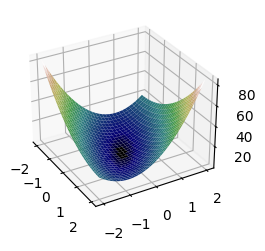

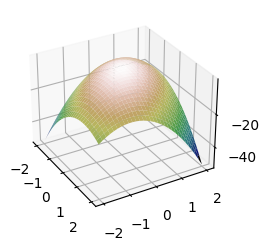

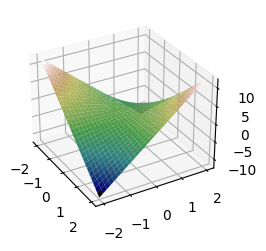

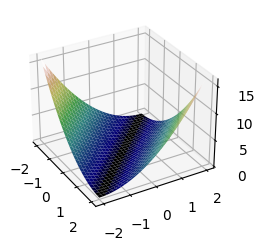

In [ ]:
# 3D plotting code

mycmap = plt.get_cmap('gist_earth')
X,Y = np.meshgrid(wRange,wRange)

for i in range(4):

    for xi in range(n):
        for yi in range(n):
            w = np.array([ wRange[xi], wRange[yi] ])
            qf[xi,yi] = w.T@S[i]@w

    # show the map
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(221+i, projection='3d')
    surf1 = ax1.plot_surface(X, Y, qf.T, cmap=mycmap)
    ax1.view_init(azim=-30, elev=30)

plt.show()

# Classification of Quadratics forms

<ipython-input-16-aee4dca2d828>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.zeros((5,), dtype=np.object)
<ipython-input-16-aee4dca2d828>:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


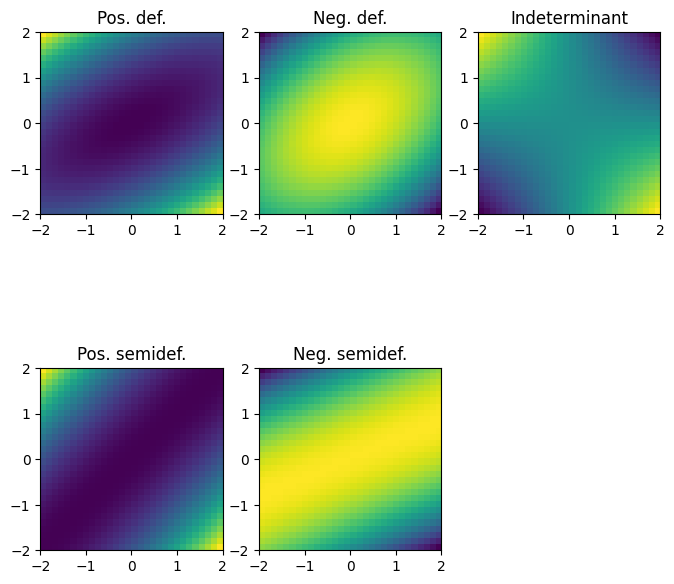

In [ ]:
# some different matrices
S = np.zeros((5,), dtype=np.object)
S[0] = [ [ 4, 4], [ 4, 9] ]
S[1] = [ [-4,-1], [-3,-5] ]
S[2] = [ [ 0, 1], [ 2, 0] ]
S[3] = [ [ 1, 1], [ 1, 1] ]
S[4] = [ [-1,-2], [-3,-6] ]



# range for vector w
n = 30
wr = 2
wRange = np.linspace(-wr,wr,n)

# initialize quadratic form matrix
qf = np.zeros( (n,n) )


fig = plt.subplots(1,figsize=(8,8))

for i in range(5):

    # compute QF
    for xi in range(n):
        for yi in range(n):
            # this w
            w = np.transpose([ wRange[xi], wRange[yi] ])

            # QF
            qf[xi,yi] = w.T@S[i]@w

    # show the map
    plt.subplot(2,3,i+1)
    plt.imshow(qf.T,extent=[-wr,wr,-wr,wr])

    ## compute the matrix's definiteness based on the eigenvalues

    # get eigenvalues
    evals = np.linalg.eig(S[i])[0]

    # we care about their signs
    esign = np.sign(evals)

    # test for signs (note: this test is valid only for 2x2 matrices!)
    if sum(esign)==2:
        defcat = 'Pos. def.'
    elif sum(esign)==1:
        defcat = 'Pos. semidef.'
    elif sum(esign)==0:
        defcat = 'Indeterminant'
    elif sum(esign)==-1:
        defcat = 'Neg. semidef.'
    elif sum(esign)==-2:
        defcat = 'Neg. def.'

    # add title
    plt.title(defcat)

plt.show()